<a href="https://colab.research.google.com/github/fechinmitchell/CMC_GAA_STATS/blob/main/shot_success_rate_by_distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset from a specified path
# Adjust the file path according to where you've uploaded your Excel file in Google Colab
df = pd.read_excel('/content/Football_Championship_2023_Shots.xlsx')  # Update the path as needed

# Convert 'Score' to a binary indicator for easier calculations
df['IsScore'] = df['Score'].apply(lambda x: 1 if x.lower() == 'score' else 0)

# Define more granular distance categories
bins = [0, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, np.inf]
labels = ['0-10m', '10-15m', '15-20m', '20-25m', '25-30m', '30-35m', '35-40m', '40-45m', '45-50m', '50-55m', '55-60m', 'Over 60m']
df['DistanceCategory'] = pd.cut(df['Shot_Distance'], bins=bins, labels=labels)

# Calculate success rates by distance category
success_rates_by_distance = df.groupby('DistanceCategory')['IsScore'].mean()

# Display the success rates by distance category
print(success_rates_by_distance)



DistanceCategory
0-10m       0.672727
10-15m      0.631068
15-20m      0.711111
20-25m      0.755319
25-30m      0.708333
30-35m      0.581395
35-40m      0.500000
40-45m      0.436620
45-50m      0.447917
50-55m      0.333333
55-60m      0.400000
Over 60m         NaN
Name: IsScore, dtype: float64


<ipython-input-3-d9c82bcf34d8>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='DistanceCategory', y='SuccessRatePercentage', data=success_rates_by_distance_df, palette='coolwarm')


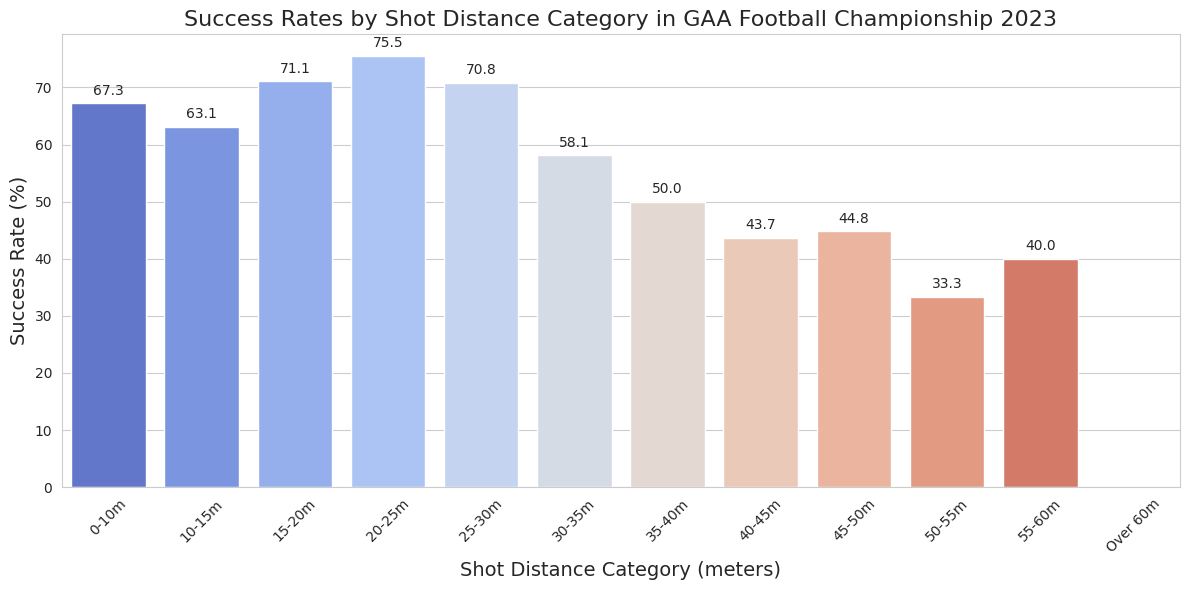

In [3]:
# Import additional visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure your dataframe is loaded and preprocessed as per the previous steps

# Convert the success rates by distance category into a format suitable for plotting
success_rates_by_distance_df = success_rates_by_distance.reset_index()
success_rates_by_distance_df['SuccessRatePercentage'] = success_rates_by_distance_df['IsScore'] * 100

# Set the visual style of the plots
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='DistanceCategory', y='SuccessRatePercentage', data=success_rates_by_distance_df, palette='coolwarm')

# Add plot title and labels
plt.title('Success Rates by Shot Distance Category in GAA Football Championship 2023', fontsize=16)
plt.xlabel('Shot Distance Category (meters)', fontsize=14)
plt.ylabel('Success Rate (%)', fontsize=14)
plt.xticks(rotation=45)  # Rotate labels to make them readable

# Optional: Add value labels on top of each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')

# Show the plot
plt.tight_layout()
plt.show()
